<a href="https://colab.research.google.com/github/bbehari13/Final-Project/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# imports
import pandas as pd
import matplotlib.pyplot as plt

# this allows numpy and plots to appear directly in the notebook
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
#Download the file
!pip install wget
import wget
output_directory = '.'
url = 'ftp://sidads.colorado.edu/DATASETS/NOAA/G02190/TSP_borehole_inventory_composite.xls'
filename = wget.download(url, out=output_directory)
image = wget.download('ftp://sidads.colorado.edu/DATASETS/NOAA/G02190/TSP_BoreHoles_location_map_highres.jpg', out=output_directory)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_excel(filename)
data

,Country Borehole ID,Region,Responsible Investigator,Borehole Name,Longitude,Latitude,Elevation (m),BH Depth (m),Class <SU=<2m,PF Thickness (m),MAGT (C),MAGT Depth (m),MAGT Date/ Period,Year Drilled,Metadata Form,CALM Site Code,Affiliation,Sponsors,Email Repsonsible Person,Comments
0,AR/JP-AZ 01,AP,J. Strelin/T. Sone,Marambio Island,-56.616667,-64.233333,200,8,SU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CADIC of Ushuaia,NaN,jstrelin@yahoo.com.ar,NaN
1,AZ 02 BR,AP,C. Schaefer,Hope Bay 1,-57.008808,-63.398706,50,1.2,<SU,NaN,NaN,NaN,NaN,2009,NaN,NaN,Federal University of Viçosa,Brazilian National Council for Science and Tec...,carlos.schaefer@ufv.br,NaN
2,AZ 03 BR,AP,C. Schaefer,Keller 8. King George Island,-58.395078,-62.082981,49,1,<SU,NaN,-1,0.92,2008,2008,NaN,NaN,Federal University of Viçosa,Brazilian National Council for Science and Tec...,carlos.schaefer@ufv.br,NaN
3,AZ 04 BR,AP,C. Schaefer,Keller 1. King George Island,-58.395078,-62.084856,28,0.99,<SU,NaN,0,1,2008,2008,NaN,NaN,Federal University of Viçosa,Brazilian National Council for Science and Tec...,carlos.schaefer@ufv.br,NaN
4,AZ 05 BR,AP,C. Schaefer,Keller 2. King George Island,-58.405253,-62.088306,37,0.98,<SU,NaN,-0.1,0.44,2008,2008,NaN,NaN,Federal University of Viçosa,Brazilian National Council for Science and Tec...,carlos.schaefer@ufv.br,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864,US O-90,North America,K.Yoshikawa,Upper Pearl Creek,-147.815000,64.899000,227,7.2,SU,NaN,NaN,7,NaN,2009,NaN,U19,Univ.of Alaska,NSF/Self,kyoshikawa@alaska.edu,BF
865,US O-91,North America,K.Yoshikawa,Valdez,-146.355000,61.139000,28,2,SU,NPF,4.66,2,NaN,2008,NaN,NaN,Univ.of Alaska,NSF/Self,kyoshikawa@alaska.edu,BF
866,US O-92,North America,K.Yoshikawa,Venetie,-146.414000,67.016000,172,3,SU,NaN,-1.09,2.5,NaN,2008,NaN,NaN,Univ.of Alaska,NSF/Self,kyoshikawa@alaska.edu,BF
867,US O-93,North America,K.Yoshikawa,Wales,-168.085000,65.605000,8,1.6,SU,NaN,-2.6,1.3,NaN,2008,NaN,NaN,Univ.of Alaska,NSF/Self,kyoshikawa@alaska.edu,BF


In [ ]:
index = data.index
cond = data['Latitude'] > 0
northindices = index[cond]

ndf=data.drop(data.index[0:(len(data.index)-len(northindices))])
print(ndf['Latitude'])

83     47.054028
84     47.053781
85     47.053511
86     69.472778
87     69.473611
         ...    
864    64.899000
865    61.139000
866    67.016000
867    65.605000
868    64.682000
Name: Latitude, Length: 786, dtype: float64


In [ ]:
ndf = ndf.dropna(subset=['PF Thickness (m)'])
index = ndf.index
cond = ndf['PF Thickness (m)'] == 'NPF'
indices = index[cond]

ndf=ndf.drop(indices)

In [ ]:
ndf['PF Thickness (m)']

96      12
97       8
99       3
100     55
101     33
      ... 
761    >25
762    >15
763    >20
765    120
827    3.8
Name: PF Thickness (m), Length: 324, dtype: object

In [ ]:
def split(word):
    return [char for char in word]
for i in ndf['PF Thickness (m)']:
  if type(i)==str:
    word = split(i)
    num = ''
    for x in word:
      if x.isdigit() or x=='.':
        num += x
      elif x == '-':
        num += ' - '
    num = [float(i) for i in num.split() if (i.isdigit() or '.' in split(i))]
    num = sum(num)/len(num)
    ndf['PF Thickness (m)'] = ndf['PF Thickness (m)'].replace([i], num)

ndf

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]


,Country Borehole ID,Region,Responsible Investigator,Borehole Name,Longitude,Latitude,Elevation (m),BH Depth (m),Class <SU=<2m,PF Thickness (m),MAGT (C),MAGT Depth (m),MAGT Date/ Period,Year Drilled,Metadata Form,CALM Site Code,Affiliation,Sponsors,Email Repsonsible Person,Comments
96,CA 11,North America,S.Smith,Fort Simpson/FS deep,-121.333333,61.837500,175,20,SH,12.0,-0.27,6,Aug 07-2008,1994,Y,NaN,Geol Surv Canada,multiple,SSmith@NRCan.gc.ca,Aug 2007-Aug 2008 avg (near level of zero amp)
97,CA 12,North America,S.Smith,Liard spruce/97TC4,-121.391667,61.545000,180,10,SH,8.0,-0.08,5,Sept07-Aug08,1997,Y,NaN,Geol Surv Canada,multiple,SSmith@NRCan.gc.ca,Sept 2007-Aug 2008 avg (level of zero amp)
99,CA 14,North America,S.Smith,Liard shrub/97TC3,-121.391667,61.545000,180,10,SH,3.0,1.38,5,Sept 07 deepest,1997,Y,NaN,Geol Surv Canada,multiple,SSmith@NRCan.gc.ca,Sep 2007 measurement at deepest available sensor
100,CA 15,North America,S.Smith,Pump Station 1/T4/84-1,-126.886111,65.289722,61,13.6,SH,55.0,-1.1,11,Jan-Dec 2008,1984,Y,NaN,Geol Surv Canada,multiple,SSmith@NRCan.gc.ca,MAGT determined from sensor close to level of ...
101,CA 16,North America,S.Smith,Canyon Ck. 2A/HT/84-2A,-126.522500,65.233333,123,128,DB,33.0,-0.31,NaN,NaN,1984,Y,NaN,Geol Surv Canada,multiple,SSmith@NRCan.gc.ca,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
761,US 78,North America,K.Yoshikawa,Caribou-Poker/TJ,-147.492778,65.155833,234,24.5,SH,25.0,-1,NaN,NaN,NaN,NaN,NaN,Univ.of Alaska,NSF,kyoshikawa@alaska.edu,NaN
762,US 79,North America,K.Yoshikawa,Caribou-Poker/CMET,-147.488333,65.153250,225,14.7,SH,15.0,-4.8,NaN,NaN,NaN,NaN,NaN,Univ.of Alaska,NSF,kyoshikawa@alaska.edu,NaN
763,US 80,North America,K.Yoshikawa,Caribou-Poker/CONF,-147.488333,65.153250,217,19.8,SH,20.0,NaN,NaN,NaN,NaN,NaN,NaN,Univ.of Alaska,NSF,kyoshikawa@alaska.edu,NaN
765,US 82,North America,K.Yoshikawa,Vault Creek,-147.698300,65.031700,215,53,IB,120.0,-0.7,NaN,NaN,NaN,NaN,NaN,Univ.of Alaska,NSF,kyoshikawa@alaska.edu,NaN


In [ ]:
for i in ndf['MAGT  (C)']:
  if type(i)==str:
    word = split(i)
    num = ''
    for x in word:
      if x.isdigit() or x=='.' or x=='-':
        num += x
      elif x == ',':
        num += '.'
    num = [float(i) for i in num.split() if (i.isdigit() or '.' in split(i))]
    num = sum(num)/len(num)
    ndf['MAGT  (C)'] = ndf['MAGT  (C)'].replace([i], num)

In [ ]:
new = ndf[['MAGT  (C)', 'PF Thickness (m)']].copy()

In [ ]:
new.describe()

,MAGT (C),PF Thickness (m)
count,278.000000,320.000000
mean,-2.280255,111.932781
std,3.054465,158.641357
min,-14.970000,0.000000
25%,-2.800000,15.000000
50%,-1.000000,47.000000
75%,-0.392500,104.500000
max,1.470000,1000.000000


In [ ]:
%pylab inline
!pip install netcdf4
import xarray as xr

!pip uninstall shapely --yes
!pip install shapely cartopy --no-binary shapely --no-binary cartopy
!wget https://raw.githubusercontent.com/SciTools/cartopy/master/tools/cartopy_feature_download.py
!python cartopy_feature_download.py physical
!python cartopy_feature_download.py cultural
!python cartopy_feature_download.py gshhs
!python cartopy_feature_download.py cultural-extra

import os
import matplotlib.pyplot as plt

import numpy as np

from cartopy import config
import cartopy.crs as ccrs

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['indices', 'split', 'cond']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Found existing installation: Shapely 1.8.0
Uninstalling Shapely-1.8.0:
  Successfully uninstalled Shapely-1.8.0
  Using cached Shapely-1.8.0.tar.gz (278 kB)
Skipping wheel build for shapely, due to binaries being disabled for it.
    Running setup.py install for shapely ... done
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.
--2021-12-18 05:38:59--  https://raw.githubusercontent.com/SciTools/cartopy/master/tools/cartopy_feature_download.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6263 (6.1K) [text/plain]
Saving to: ‘cartopy_f

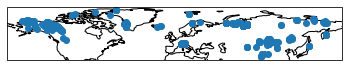

In [ ]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt


ax = plt.axes(projection=ccrs.PlateCarree())
plt.plot(ndf['Longitude'], ndf['Latitude'], linestyle='None', marker='o')
ax.coastlines()
